In [1]:
#Author: Charles Jason C. Diaz
#Notebook can be found in https://github.com/werhu/Physics

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Constant size of images constructed
size = 128

## RGB to Grayscale conversion function

In [3]:
#converts an rgb array into a grayscale array
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

## Familiarization with discrete FFT

In [4]:
def fourier(data):
    plt.imshow(data, cmap = 'gray') #Displays the initial image
    plt.show()
    datafft = abs(np.fft.fft2(data))
    plt.imshow(datafft, cmap = 'gray') #Displays the FT of the image
    plt.show()
    datashift = np.fft.fftshift(datafft)
    plt.imshow(datashift, cmap = 'gray') #Displays the FT modulus of the image
    plt.show()
    datafft2 = abs(np.fft.fft2(datafft))
    plt.imshow(datafft2, cmap = 'gray') #Displays the FT of the FT of the image
    plt.show()

### Circle Fourier transforms

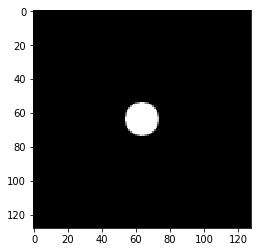

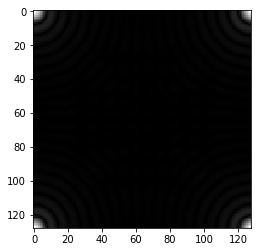

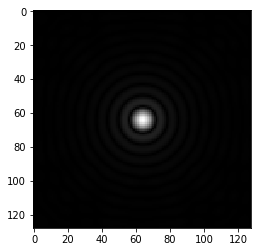

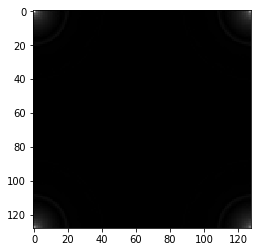

'As seen, the expected result for the circle can be seen: the shifted 2D FFT of the circle shows an airy disk. \nThe image of the circle is not perfect, meaning it has low resolution. This gives the airy disk pattern of the FT.\nThe unshifted 2D FFT has the quadrants rotated, which places the corners of the circle to the corners of the image.\n'

In [5]:
circ = rgb2gray(plt.imread('circle.png'))
fourier(circ)

"""As seen, the expected result for the circle can be seen: the shifted 2D FFT of the circle shows an airy disk. 
The image of the circle is not perfect, meaning it has low resolution. This gives the airy disk pattern of the FT.
The unshifted 2D FFT has the quadrants rotated, which places the corners of the circle to the corners of the image.
"""

### Letter A Fourier Transforms

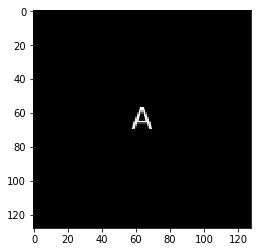

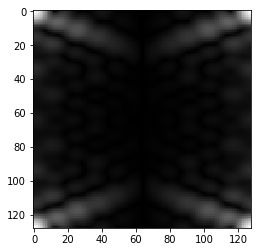

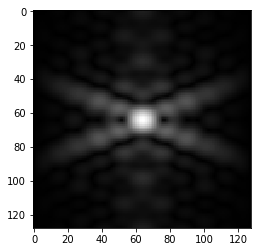

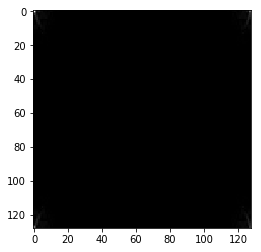

' The image of A used is not perfectly sharp. This gives rise to various frequencies in the image, which can be seen in the FTs of A.'

In [6]:
A = rgb2gray(plt.imread('A.png'))
fourier(A)

""" The image of A used is not perfectly sharp. This gives rise to various frequencies in the image, which can be seen in the FTs of A."""

### Corrugated Roof Fourier Transforms

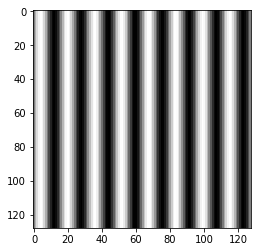

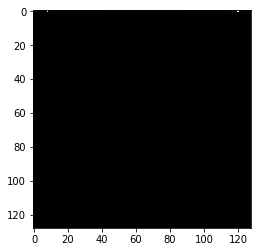

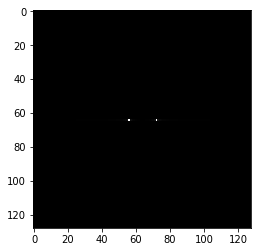

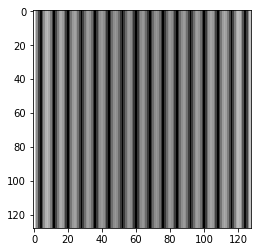

'Seen here is the FTs of a sinusoid in x. There are two dots in the FT modulus of the image, meaning there are two peak colors in the image.'

In [7]:
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X,Y = np.meshgrid(x,y)
f = 4 #frequency
z = np.sin(2*np.pi*f*X) 
fourier(z)

"""Seen here is the FTs of a sinusoid in x. There are two dots in the FT modulus of the image, meaning there are two peak colors in the image."""

### Square

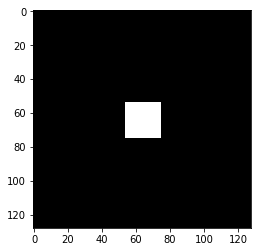

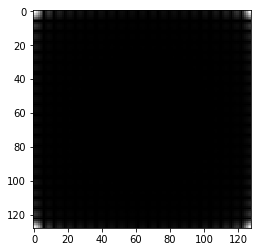

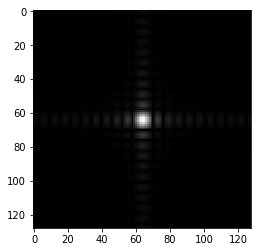

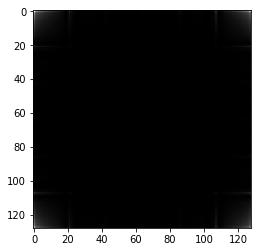

'The square has frequency in both axes, which leads to the FT modulus seen here: bands extending from the central square both horizontally and vertically.'

In [8]:
side = 20 #size of the square
square = np.zeros([size,size])
for i in range(0,size):
    for j in range(0,size):
        if ((i >= (size/2)-side//2 and i <= (size/2)+side//2) and (j >= (size/2)-side//2 and j <= (size/2)+side//2)):
            square[i,j] = 1
fourier(square)

"""The square has frequency in both axes, which leads to the FT modulus seen here: bands extending from the central square both horizontally and vertically."""

## Simulation of an imaging device

### User defined Convolution function

In [9]:
def convolution(data, aperture):
    plt.imshow(data, cmap = "gray")
    plt.show()
    datafft = np.fft.fft2(data)
    lensshift = np.fft.fftshift(aperture)
    FRA = lensshift * datafft
    IRA = np.fft.fft2(FRA)
    Image = abs(IRA)
    plt.imshow(Image, cmap = "gray")
    plt.show()

In [10]:
vip = rgb2gray(plt.imread("VIP.png"))
lens = rgb2gray(plt.imread('circle.png'))
lensbig = rgb2gray(plt.imread('circlebig.png'))

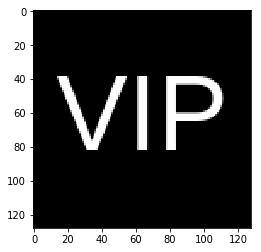

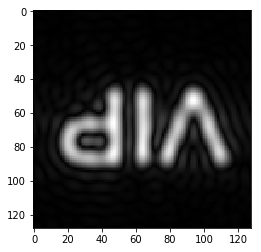

In [11]:
convolution(vip, lens)

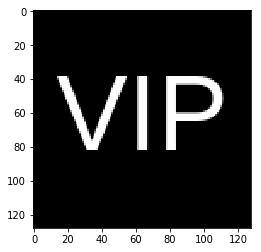

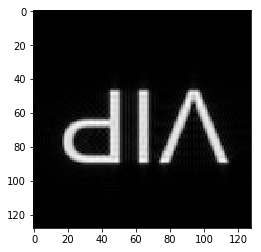

In [12]:
convolution(vip, lensbig)

## Template matching using Correlation

In [13]:
sentence = rgb2gray(plt.imread("sentence.png"))
A = rgb2gray(plt.imread('A.png'))

In [14]:
sentencefft = np.fft.fft2(sentence)
Afft = np.fft.fft2(A)
sentenceconj = np.conj(sentencefft) #conjugate of the FT of the image

In [15]:
Image = np.zeros([128,128])
Image = np.fft.fft2(Afft * sentenceconj)

In [16]:
Imageinv = abs(np.fft.fftshift(Image))

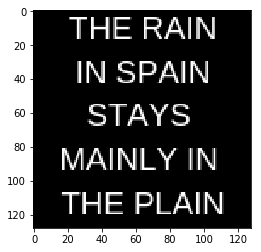

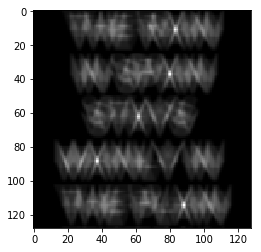

In [17]:
plt.imshow(sentence, cmap = "gray")
plt.show()
plt.imshow(Imageinv, cmap = "gray")
plt.show()

## Edge Detection using the convolution integral

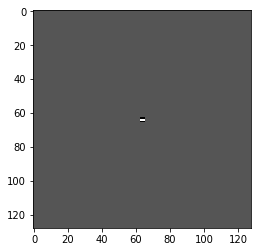

In [18]:
patternhori = np.zeros([size,size])
patternhori[size//2-1:size//2+2,size//2-1:size//2+2] = -1
patternhori[size//2,size//2-1:size//2+2] = 2
plt.imshow(patternhori, cmap="gray")

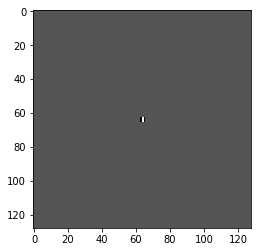

In [19]:
patternvert = np.zeros([size,size])
patternvert[size//2-1:size//2+2,size//2-1:size//2+2] = -1
patternvert[size//2-1:size//2+2,size//2] = 2
plt.imshow(patternvert, cmap="gray")

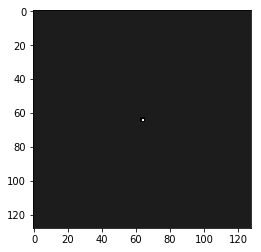

In [20]:
patternspot = np.zeros([size,size])
patternspot[size//2-1:size//2+2,size//2-1:size//2+2] = -1
patternspot[size//2,size//2] = 8
plt.imshow(patternspot, cmap="gray")

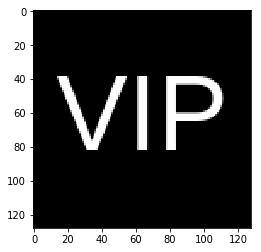

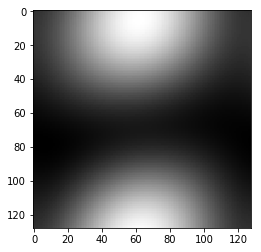

In [21]:
convolution(vip, patternhori)

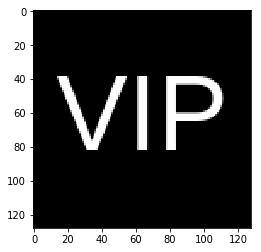

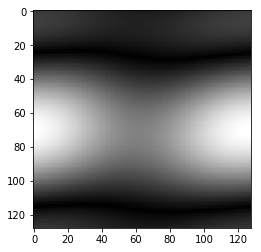

In [22]:
convolution(vip, patternvert)

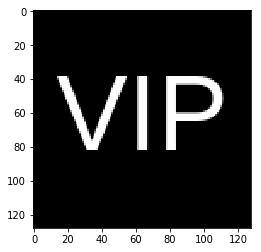

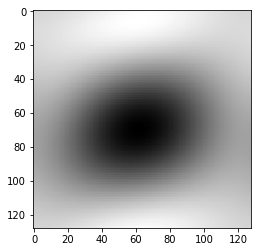

In [23]:
convolution(vip, patternspot)

## Anamorphic Property of FT of different 2D patterns

In [24]:
#User defined anamorphism function
def anamorphism(data):
    plt.imshow(data, cmap = 'gray')
    plt.show()
    datafft = np.fft.fft2(data)
    datashift = abs(np.fft.fftshift(datafft))
    plt.imshow(datashift, cmap = 'gray')
    plt.show()

In [25]:
tall = rgb2gray(plt.imread('Tall Rectangle.png'))
wide = rgb2gray(plt.imread('Wide Rectangle.png'))
dotsclose = np.zeros([size,size])
dotsfar = np.zeros([size,size])

#Dots image constructor
for i in range(0,size):
    for j in range(0,size):
        if i == size/2:
            if j == (size/2-5) or j == (size/2+5):
                dotsclose[i,j] = 1
            elif j == (size/2-10) or j == (size/2+10):
                dotsfar[i,j] = 1

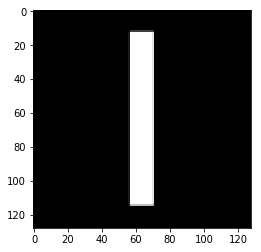

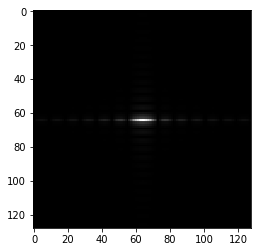

In [26]:
anamorphism(tall)

#The FT of this rectangle is wide at the horizontal axis, which is where this rectangle is shorter at.

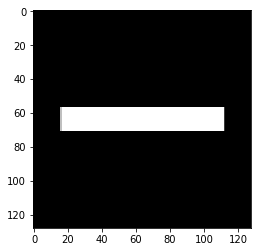

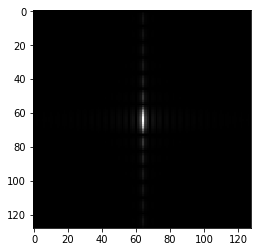

In [27]:
anamorphism(wide)
#The FT of this triangle is wide at the vertical axis, which is where this rectangle is shorter at.

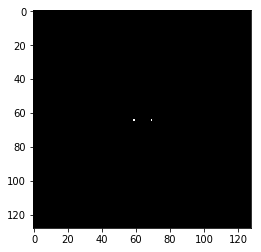

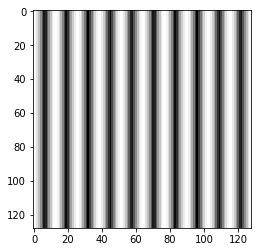

In [28]:
anamorphism(dotsclose)

#As seen in a previous section, the FT of a sinusoid is two dots. Thus when the FT of two dots (symmetrical along the center) are taken, they produced a sinusoid pattern.

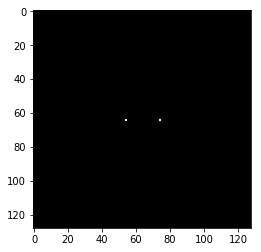

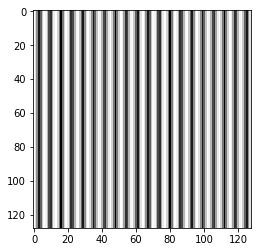

In [29]:
anamorphism(dotsfar)

#The FT sinusoid pattern of two dots that are farther from one another has a higher frequency as compared to two dots that are closer to each other (as seen in the previous plot)

## Rotation Property of the FT

In [30]:
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X,Y = np.meshgrid(x,y)

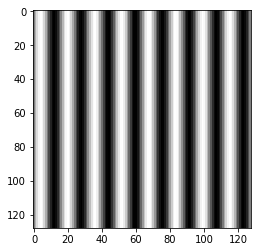

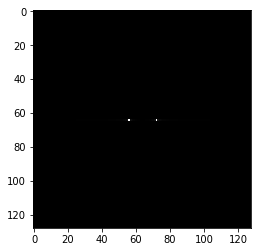

In [31]:
f = 4
z = np.sin(2*np.pi*f*X)
anamorphism(z)
#Once again, the FT of a sinusoid is two dots.

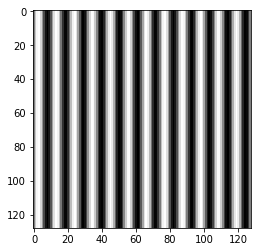

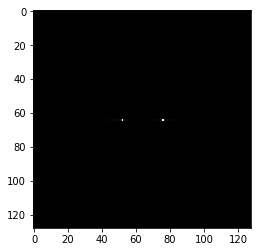

In [32]:
f = 6
z = np.sin(2*np.pi*f*X)
anamorphism(z)
#Increasing the frequency of the sinusoid increased the distance between the two dots.

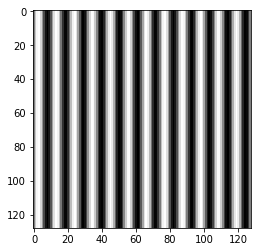

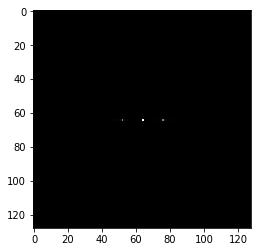

In [33]:
z = np.sin(2*np.pi*f*X)+1
anamorphism(z)
#Adding a constant bias to the sinusoid produced another dot in the FT, in the middle of the previous two dots.

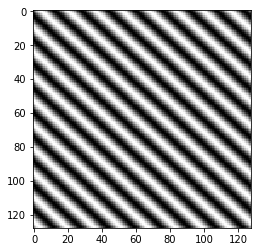

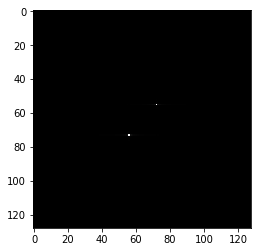

In [34]:
theta = 40
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)))
anamorphism(z)
#Rotating the sinusoid also rotated the two dots at the same angle.

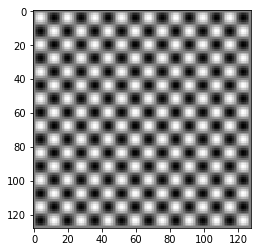

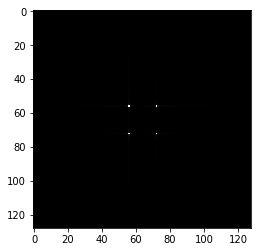

In [35]:
z = np.sin(2*np.pi*4*X)*np.sin(2*np.pi*4*Y)
anamorphism(z)
#Adding two sinusoids together produced two more dots in the FT of the sinusoid product.

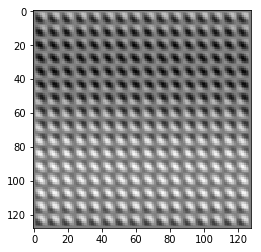

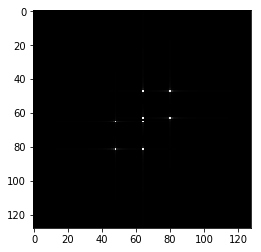

In [36]:
z = np.sin(2*np.pi*4*X)*np.sin(2*np.pi*4*Y)*np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)))
anamorphism(z)
#Taking into account the previous results, I predicted that adding a rotated sinusoid to two sinusoids would: add 2 more angled dots at the FT of the product.
#The result of the above process actually looks like the FT of the initial two sinusoids was translated at an angle, meaning my prediction was wrong.

## Convolution Theorem Redux

### 2 Dots

In [37]:
Image = np.zeros([size,size])
for i in range(0,size):
    for j in range(0,size):
        if i == size/2:
            if j == (size/2-10) or j == (size/2+10):
                Image[i,j] = 1

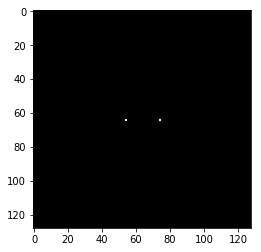

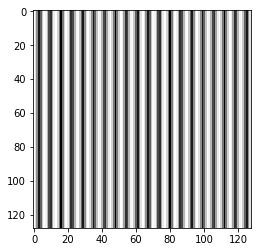

In [38]:
anamorphism(Image) #FT modulus of two dots displayed: a sinusoid.

### 2 Circles

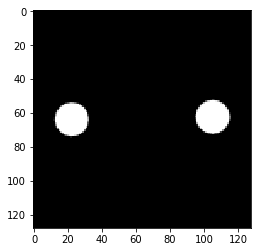

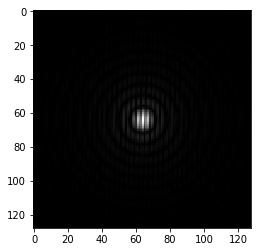

In [39]:
circles = rgb2gray(plt.imread('Two dots.png'))
anamorphism(circles)

#FT modulus of circles displayed: an airy pattern cut by vertical lines

### 2 Squares

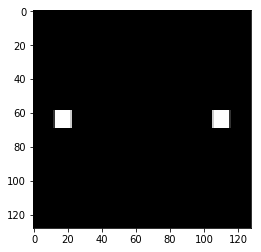

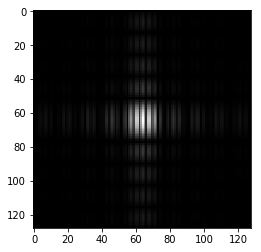

In [40]:
squares = rgb2gray(plt.imread('2squares.png'))
anamorphism(squares)

#FT modulus of squares displayed: the FT of a square cut by vertical lines

### Gaussian

In [41]:
sigma = 2
mu = 0
amp = 1 / (sigma*np.sqrt(2*np.pi))
rad = 20
xg = np.linspace(-5,5,rad)
yg = np.linspace(-5,5,rad)
XG,YG = np.meshgrid(xg,yg)
r = np.sqrt(XG**2 + YG**2)
r = r*-1

In [42]:
gaus = np.ones([size,size])
gaus = gaus*-7
row = -1
column = 0

#adds equidistant gaussian circles to the image
for i in range(0,size):
    for j in range(0,size):
        if ((i >= size/2 - rad/2) and (i <= size/2 + rad/2)):
            if (j >= size/2 - 30 and j < size/2 - 10) or (j > size/2 + 10 and j <= size/2 + 30):
                gaus[i,j] = r[row,column]
                column += 1
            else:
                column = 0
    if (i >= size/2 - 10 and i <= size/2 + 10):
        row += 1

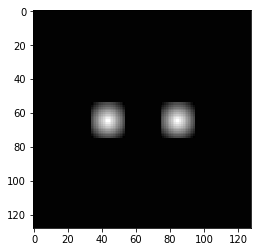

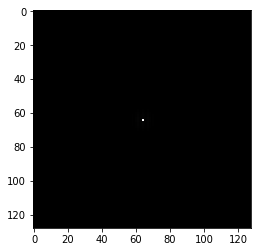

In [43]:
anamorphism(gaus) #Result: a single dot. I attribute this to the error of my method of creating the gaussian: r is negative, which means gaus is also negative.

### Dirac Delta

In [44]:
A = np.zeros([size,size])

#Sets up an image with 10 random dots
for i in range(0,10):
    x = np.random.randint(0,size)
    y = np.random.randint(0,size)
    while(True):
        if A[x,y] == 0:
            A[x,y] = 1
            break
        else:
            continue

d = np.zeros([size,size])
d[size//2-5:size//2+5,size//2-5:size//2+5] = 1

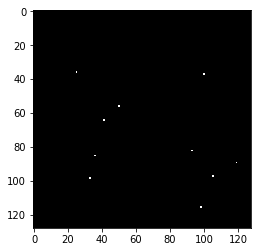

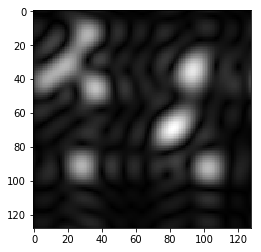

In [45]:
convolution(A, d)
#The image A is convolved with a vertical line, where the convolution result is shown below.

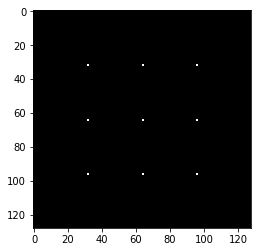

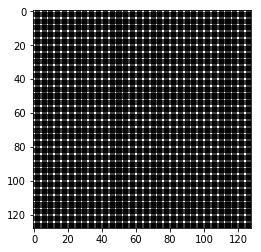

In [46]:
d = np.zeros([size,size])
e = size//4
for i in range(1,4):
    d[e*i,[e*1,e*2,e*3]] = 1
anamorphism(d)

#Dots equally spaced with each other, less spacing of the dots in the FT

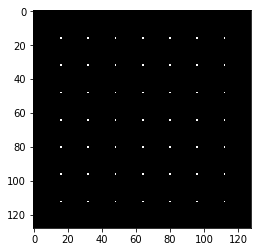

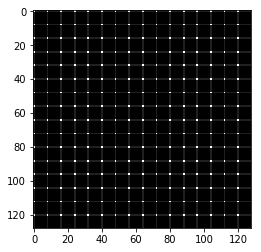

In [47]:
d = np.zeros([size,size])
e = size//8
for i in range(1,8):
    d[e*i,[e*1,e*2,e*3,e*4,e*5,e*6,e*7]] = 1
anamorphism(d)

#Dots equally spaced with each other with less spacing, more spacing of the dots in the FT

## Fingerprints : Ridge Enhancement

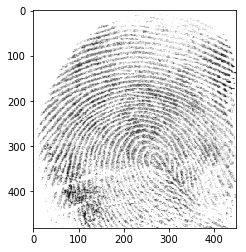

In [48]:
#Fingerprint image lifted from: http://hristoalexiev.blogspot.com/p/computer-vision.html
finger = rgb2gray(plt.imread('Raw Fingerprint.jpg'))
plt.imshow(finger, cmap="gray")

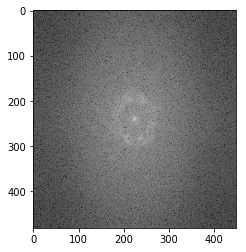

In [49]:
fingerfft = np.fft.fft2(finger)
fingershift = np.log(abs(np.fft.fftshift(fingerfft)))
plt.imshow(fingershift, cmap = "gray") #Frequencies in the fingerprint image. Fingerprint noticeable.
filterf = fingershift
filterf[np.where(fingershift<9)] = 0 #Masks the elements in fingershift less than 9

final = np.flip(np.abs(np.fft.fft2(np.fft.fft2(finger)*np.fft.fftshift(filterf)))) #Masked image

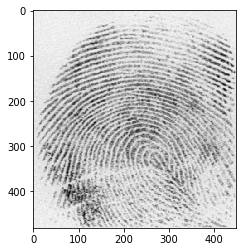

In [50]:
plt.imshow(final, cmap = "gray")

## Lunar Landing Scanned Pictures : Line removal

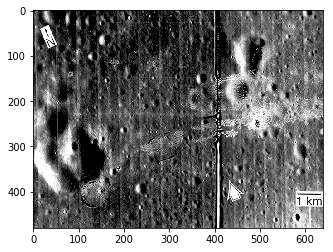

In [51]:
lunar = rgb2gray(plt.imread('lunar.gif'))
plt.imshow(lunar, cmap="gray")

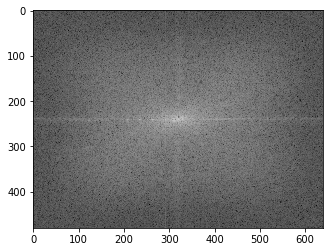

In [52]:
lunarfft = np.fft.fft2(lunar)
lunarshift = np.log(abs(np.fft.fftshift(lunarfft)))
plt.imshow(lunarshift, cmap = "gray") #Frequencies in the lunar image. Vertical and Horizontal lines noticeable.
filterl = lunarshift
filterl[np.where(lunarshift<11)] = 0

final = np.flip(np.abs(np.fft.fft2(np.fft.fft2(lunar)*np.fft.fftshift(filterl))))

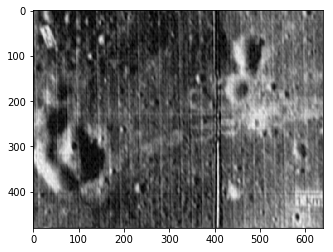

In [53]:
plt.imshow(final, cmap = "gray")
#Masking was not successful because the condition was not enough.

## Canvas Weave Modeling and Removal

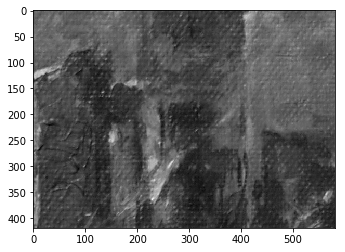

In [54]:
canvas = rgb2gray(plt.imread('canvas.JPG'))
plt.imshow(canvas, cmap="gray")

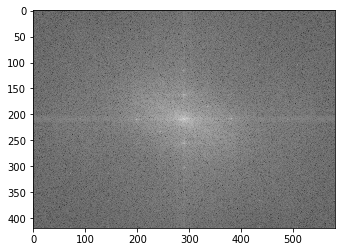

In [55]:
canvasfft = np.fft.fft2(canvas)
canvasshift = np.log(abs(np.fft.fftshift(canvasfft)))
plt.imshow(canvasshift, cmap = "gray") #Frequencies in the canvas image. Vertical and Horizontal lines noticeable.
filterc = canvasshift
filterc[np.where(canvasshift<9)] = 0

final = np.flip(np.abs(np.fft.fft2(np.fft.fft2(canvas)*np.fft.fftshift(filterc))))

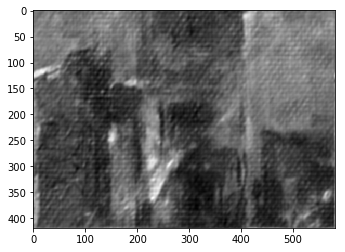

In [56]:
plt.imshow(final, cmap = "gray")
#Masking semi-successful, lowerleft still has noticeable brushstrokes.